# 타이타닉 데이터셋 케글 필사

## 목차

- 1. 파일 불러오기 및 컬럼 설명
- 2. EDA
- 3. 데이터 전처리
- 4. 모델 학습
- 5. 모델 평가

### 1. 파일 불러오기 및 컬럼 설명

In [13]:
# train 파일 불러오기

import pandas as pd
#train 
origin_train = pd.read_csv('https://raw.githubusercontent.com/youngsoopar/Aiffel_Core_Quest/main/Main_Quest02/train.csv')
origin_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 각 컬럼별 설명

- survival	생존	0 = No, 1 = Yes
- pclass	티켓 등급	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	성별
- Age	나이
- sibsp	동반한 형제자매와 배우자 수
- parch	동반한 부모자식 수
- ticket	티켓 고유번호
- fare	티켓 요금
- cabin	객실 번호
- embarked	승선한 항구	C = Cherbourg, Q = Queenstown, S = Southampton

In [14]:
# 라이브러리 불러오기
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
# 원본 복사
train = origin_train.copy()
train.head()

TypeError: 'Index' object is not callable

In [65]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2. EDA

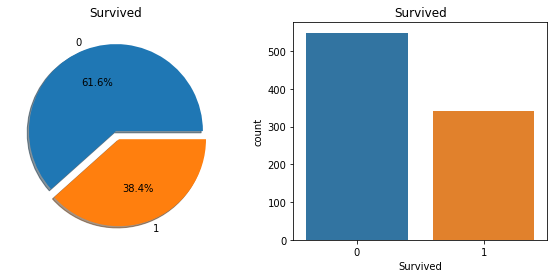

In [32]:
# 컬럼별 데이터 시각화 (생존율 = target)
# 전체 기준 생존율
f, ax = plt.subplots(1,2,figsize= (10, 4)) # 하나의 행과 두 개의 열을 가진 그래프 영역, 크기는 (10, 4), 
train['Survived'].value_counts().plot.pie(explode = [0,0.1], # dataset의 생존 컬럼으로 계산 후 pie 차트로 표출. explode로 부채꼴 강조
        autopct='%1.1f%%',                 # 생존율 소수 첫째 자리까지 표시
        ax = ax[0], shadow = [True])      # ax = ax=[0]은 데이터 영역 위치 첫번째 설정, 그림자 효과 넣기
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',
              data = train, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [23]:
# 각 Pclass 별 생존자 수
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### Pclass 별 생존율
- 1등급 : 136 / 216 = 62.96%
- 2등급 : 87 / 184 = 47.28%
- 3등급 : 119 / 491 = 24.23%

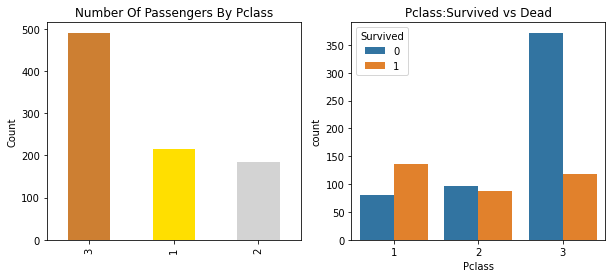

In [31]:
# Pclass 기준 생존자 수 도식화
f,ax=plt.subplots(1,2,figsize=(10,4))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [27]:
# 성별 기준 생존자 수
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 성별 생존율

- 여성 생존율 : 233 / (233+81) = 약 74.20%
- 남성 생존율 : 109 / (109+468) = 약 18.89%

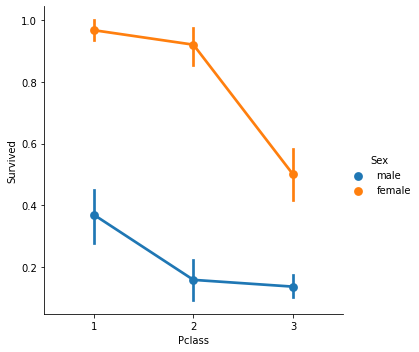

In [34]:
# 객실 등급 및 성별을 조합하여 그래프 시각화
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

In [40]:
# 연령기준 기본 데이터
print('최고 연령 : ', train['Age'].max(),'세')
print('최저 연령 : ',train['Age'].min(),'세')
print('평균 연령 : ',train['Age'].mean(),'세')

최고 연령 :  80.0 세
최저 연령 :  0.42 세
평균 연령 :  29.69911764705882 세


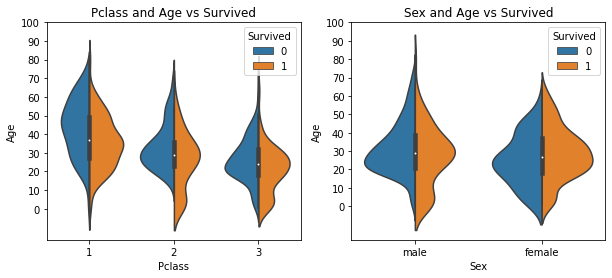

In [41]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### EDA를 통한 관측

- 객실 등급이 높을수록 생존율이 높음
- 여성의 생존율이 비교적 높음.
- 연령이 아주 어리면(10대 이하) 생존율이 높음

### 3. 데이터 전처리

In [43]:
# 결측값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
# Age 결측값 평균치인 29세 기입
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [48]:
# Cabin 결측값 컬럼 삭제
train = train.drop('Cabin', axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [52]:
counts = train.groupby('Embarked').size()
print(counts)

Embarked
C    168
Q     77
S    644
dtype: int64


In [54]:
#Embarked 결측값에는 최대 빈도 값인 'S' 채움
train = train['Embarked'].fillna('S')

In [55]:
#결측값 확인
train.isnull().sum()

0

In [66]:
# 성별 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le
train['Sex'] = le.fit_transform(train['Sex'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


### 4. 모델 학습

In [68]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train.test.split()

In [ ]:
import 

### 5. 모델 평가